In [2]:
import pandas as pd
import seaborn as sns
import matplotlib

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [3]:
# загрузим датасет iris
print(sns.get_dataset_names())
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)
df_iris.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,versicolor
24,4.8,3.4,1.9,0.2,setosa
80,5.5,2.4,3.8,1.1,versicolor
119,6.0,2.2,5.0,1.5,virginica
50,7.0,3.2,4.7,1.4,versicolor


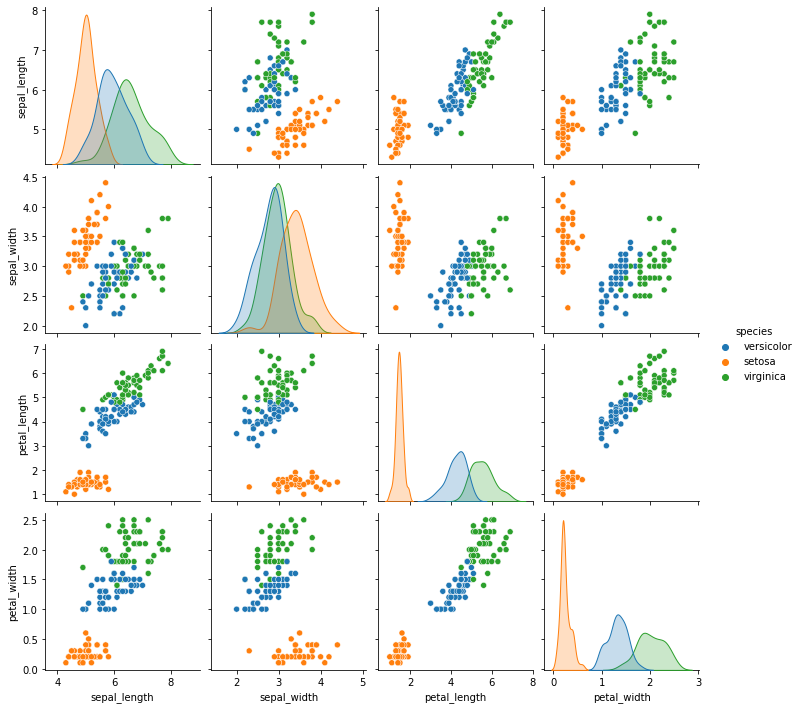

In [4]:
# Построим графики pair plot
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")

In [5]:
# закодируем значения

from sklearn import preprocessing

enc = preprocessing.LabelEncoder()
enc.fit(df_iris['species'])
df_iris['species'] = enc.transform(df_iris['species'])
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,1
24,4.8,3.4,1.9,0.2,0
80,5.5,2.4,3.8,1.1,1
119,6.0,2.2,5.0,1.5,2
50,7.0,3.2,4.7,1.4,1
...,...,...,...,...,...
57,4.9,2.4,3.3,1.0,1
34,4.9,3.1,1.5,0.2,0
139,6.9,3.1,5.4,2.1,2
33,5.5,4.2,1.4,0.2,0


In [6]:
# выбросим колонку, которую будем предсказывать
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

print(iris_X.shape, iris_y.shape )

(150, 4) (150,)


In [7]:
def train_test_split_data(X, y):
  # разделим на train test слайсингом
  X_train, y_train = X[:100], y[:100]
  X_test, y_test = X[100:], y[100:]

  return X_train, X_test, y_train, y_test


def get_scores(y_true, y_pred, y_pred_proba):
    # Посмотрим на матрицу ошибок
  mp_mtx = metrics.confusion_matrix(y_true, y_pred)

  fig = plt.figure(figsize=(10,8))
  matplotlib.rc('xtick', labelsize=15) 
  matplotlib.rc('ytick', labelsize=15)
  sns.heatmap(mp_mtx, annot=True, fmt="d", 
              xticklabels=df_iris["species"].unique(), 
              yticklabels=df_iris["species"].unique())
  plt.ylabel("Real value")
  plt.xlabel("Predicted value") 

  # словарь с оценками
  scores = {}

  # recall_score
  scores['recall_score_macro'] = metrics.recall_score(y_true, y_pred, average='macro')
  scores['recall_score_micro'] = metrics.recall_score(y_true, y_pred, average='micro')
  
  # precision_score
  scores['precision_score_macro'] = metrics.precision_score(y_true, y_pred, average='macro')
  scores['precision_score_micro'] = metrics.precision_score(y_true, y_pred, average='micro')

  # accuracy_score
  scores['accuracy_score_normalize_true'] = metrics.accuracy_score(y_true, y_pred, normalize=True)
  # scores['accuracy_score_normalize_false'] = metrics.accuracy_score(y_true, y_pred, normalize=False)

  # f1_score
  scores['f1_score_macro'] = metrics.f1_score(y_true, y_pred, average='macro')
  scores['f1_score_micro'] = metrics.f1_score(y_true, y_pred, average='micro')

  # roc_auc_score
  scores['roc_auc_score_ovo_macro'] = metrics.roc_auc_score(y_true, y_pred_proba, multi_class='ovo', average='macro')
  scores['roc_auc_score_ovo_weighted'] = metrics.roc_auc_score(y_true, y_pred_proba, multi_class='ovo', average='weighted')
  scores['roc_auc_score_ovr_macro'] = metrics.roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='macro')
  scores['roc_auc_score_ovr_weighted'] = metrics.roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='weighted')

  return scores


def get_y_pred_knn(X, y):  
  # разделим на train test
  X_train, X_test, y_train, y_test = train_test_split_data(X, y)
  
  # тренируем модель
  knn = KNeighborsClassifier().fit(X_train, y_train)

  # предсказываем
  y_pred_knn = knn.predict(X_test)

  # Оценки вероятности
  y_pred_proba_knn = knn.predict_proba(X_test)

  # получить оценки
  scores = get_scores(y_test, y_pred_knn, y_pred_proba_knn)

  return scores


def get_y_pred_log_reg(X, y):
  # разделим на train test
  X_train, X_test, y_train, y_test = train_test_split_data(X, y)

  # тренируем модель
  log_reg = LogisticRegression(random_state=0, n_jobs=-1).fit(X_train, y_train)

  # предсказываем
  y_pred_log_reg = log_reg.predict(X_test)

  # Оценки вероятности
  y_pred_proba_log_reg = log_reg.predict_proba(X_test)

  # получить оценки
  scores = get_scores(y_test, y_pred_log_reg, y_pred_proba_log_reg)

  return scores


{'recall_score_macro': 0.9861111111111112,
 'recall_score_micro': 0.98,
 'precision_score_macro': 0.9743589743589745,
 'precision_score_micro': 0.98,
 'accuracy_score_normalize_true': 0.98,
 'f1_score_macro': 0.9795744680851063,
 'f1_score_micro': 0.98,
 'roc_auc_score_ovo_macro': 1.0,
 'roc_auc_score_ovo_weighted': 1.0,
 'roc_auc_score_ovr_macro': 1.0,
 'roc_auc_score_ovr_weighted': 1.0}

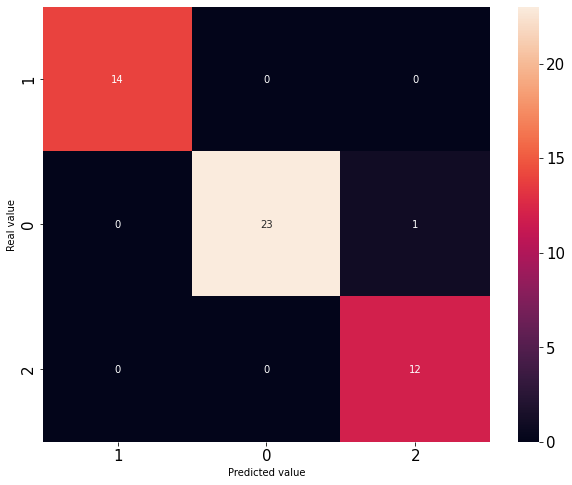

In [8]:
# Ненормированные данные knn
scores_knn = get_y_pred_knn(iris_X, iris_y)
scores_knn

{'recall_score_macro': 0.9861111111111112,
 'recall_score_micro': 0.98,
 'precision_score_macro': 0.9743589743589745,
 'precision_score_micro': 0.98,
 'accuracy_score_normalize_true': 0.98,
 'f1_score_macro': 0.9795744680851063,
 'f1_score_micro': 0.98,
 'roc_auc_score_ovo_macro': 1.0,
 'roc_auc_score_ovo_weighted': 1.0,
 'roc_auc_score_ovr_macro': 1.0,
 'roc_auc_score_ovr_weighted': 1.0}

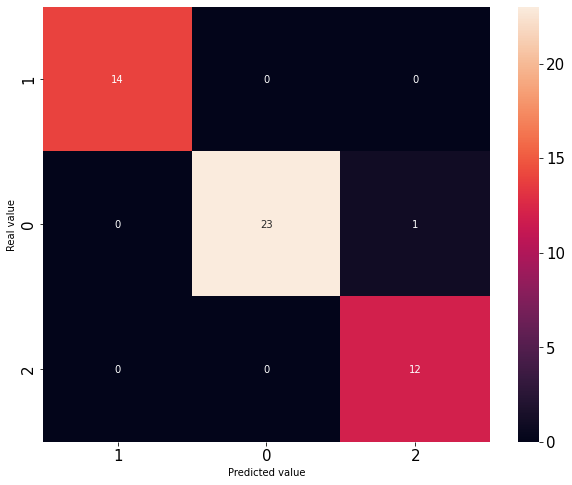

In [9]:
# Ненормированные данные log reg
scores_log_reg = get_y_pred_log_reg(iris_X, iris_y)
scores_log_reg

In [10]:
# Нормализация данных (X - X.mean(axis=0)) / X.std(axis=0)
iris_X_norm_1 = (iris_X - iris_X.mean(axis=0)) / iris_X.std(axis=0)
iris_X_norm_1[:5]

array([[ 0.31099753, -0.13197948,  0.47857113,  0.26414192],
       [-1.26418478,  0.78880759, -1.05603939, -1.3154443 ],
       [-0.41600969, -1.51316008,  0.02387172, -0.13075464],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ],
       [ 1.40150837,  0.32841405,  0.53540856,  0.26414192]])

{'recall_score_macro': 0.9722222222222222,
 'recall_score_micro': 0.96,
 'precision_score_macro': 0.9523809523809524,
 'precision_score_micro': 0.96,
 'accuracy_score_normalize_true': 0.96,
 'f1_score_macro': 0.959866220735786,
 'f1_score_micro': 0.96,
 'roc_auc_score_ovo_macro': 1.0,
 'roc_auc_score_ovo_weighted': 1.0,
 'roc_auc_score_ovr_macro': 1.0,
 'roc_auc_score_ovr_weighted': 1.0}

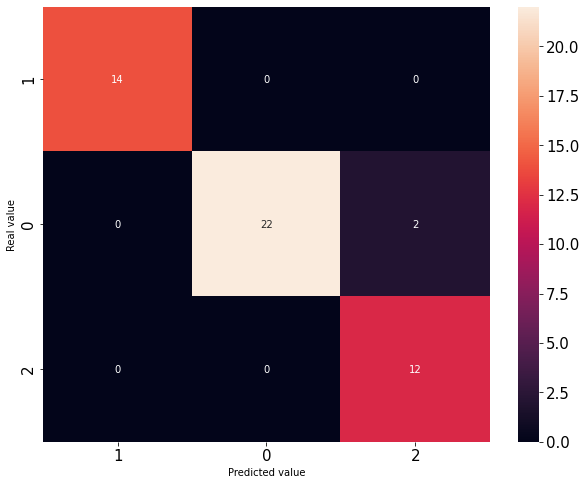

In [11]:
# Нормированные данные knn - вариант 1
scores_knn_norm_1 = get_y_pred_knn(iris_X_norm_1, iris_y)
scores_knn_norm_1

{'recall_score_macro': 0.9861111111111112,
 'recall_score_micro': 0.98,
 'precision_score_macro': 0.9743589743589745,
 'precision_score_micro': 0.98,
 'accuracy_score_normalize_true': 0.98,
 'f1_score_macro': 0.9795744680851063,
 'f1_score_micro': 0.98,
 'roc_auc_score_ovo_macro': 1.0,
 'roc_auc_score_ovo_weighted': 1.0,
 'roc_auc_score_ovr_macro': 1.0,
 'roc_auc_score_ovr_weighted': 1.0}

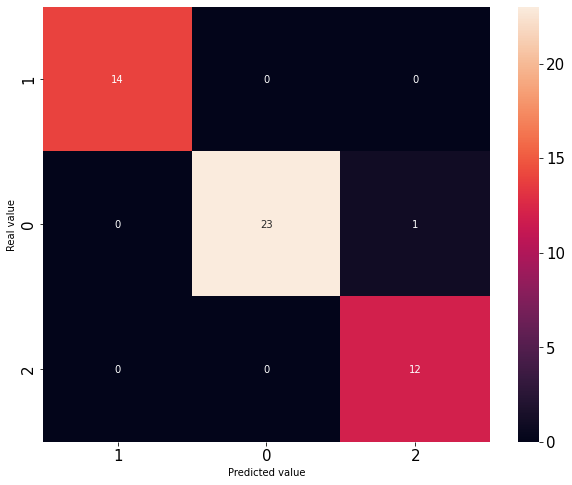

In [12]:
# нормированные данные log reg - вариант 1
scores_log_reg_norm_1 = get_y_pred_log_reg(iris_X_norm_1, iris_y)
scores_log_reg_norm_1

In [13]:
# Нормализация данных (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
iris_X_norm_2 = (iris_X - iris_X.min(axis=0)) / (iris_X.max(axis=0) - iris_X.min(axis=0))
iris_X_norm_2[:5]

array([[0.5       , 0.41666667, 0.61016949, 0.54166667],
       [0.13888889, 0.58333333, 0.15254237, 0.04166667],
       [0.33333333, 0.16666667, 0.47457627, 0.41666667],
       [0.47222222, 0.08333333, 0.6779661 , 0.58333333],
       [0.75      , 0.5       , 0.62711864, 0.54166667]])

{'recall_score_macro': 0.9861111111111112,
 'recall_score_micro': 0.98,
 'precision_score_macro': 0.9743589743589745,
 'precision_score_micro': 0.98,
 'accuracy_score_normalize_true': 0.98,
 'f1_score_macro': 0.9795744680851063,
 'f1_score_micro': 0.98,
 'roc_auc_score_ovo_macro': 1.0,
 'roc_auc_score_ovo_weighted': 1.0,
 'roc_auc_score_ovr_macro': 1.0,
 'roc_auc_score_ovr_weighted': 1.0}

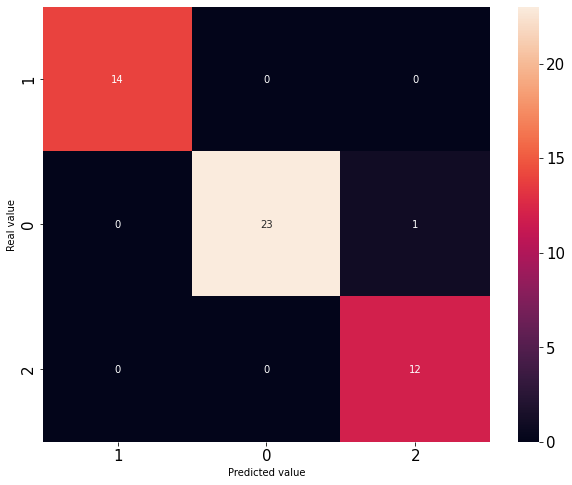

In [14]:
# Нормированные данные knn - вариант 2
scores_knn_norm_2 = get_y_pred_knn(iris_X_norm_2, iris_y)
scores_knn_norm_2

{'recall_score_macro': 0.8888888888888888,
 'recall_score_micro': 0.84,
 'precision_score_macro': 0.8666666666666667,
 'precision_score_micro': 0.84,
 'accuracy_score_normalize_true': 0.84,
 'f1_score_macro': 0.85,
 'f1_score_micro': 0.8399999999999999,
 'roc_auc_score_ovo_macro': 0.9988425925925926,
 'roc_auc_score_ovo_weighted': 0.99875,
 'roc_auc_score_ovr_macro': 0.9989316239316239,
 'roc_auc_score_ovr_weighted': 0.9984615384615384}

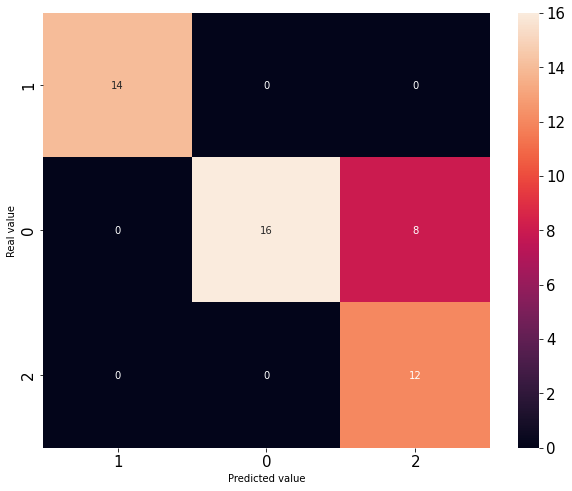

In [15]:
# нормированные данные log reg - вариант 2
scores_log_reg_norm_2 = get_y_pred_log_reg(iris_X_norm_2, iris_y)
scores_log_reg_norm_2

In [16]:
scores_list = [scores_knn, scores_log_reg, 
               scores_knn_norm_1, scores_log_reg_norm_1, 
               scores_knn_norm_2, scores_log_reg_norm_2]
scores_names = ['knn', 'log_reg', 'knn_norm_1', 'log_reg_norm_1', 'knn_norm_2', 'log_reg_norm_2']


In [17]:
df_scores = pd.DataFrame(data=scores_list, index=scores_names)
df_scores

,recall_score_macro,recall_score_micro,precision_score_macro,precision_score_micro,accuracy_score_normalize_true,f1_score_macro,f1_score_micro,roc_auc_score_ovo_macro,roc_auc_score_ovo_weighted,roc_auc_score_ovr_macro,roc_auc_score_ovr_weighted
knn,0.986111,0.98,0.974359,0.98,0.98,0.979574,0.98,1.000000,1.00000,1.000000,1.000000
log_reg,0.986111,0.98,0.974359,0.98,0.98,0.979574,0.98,1.000000,1.00000,1.000000,1.000000
knn_norm_1,0.972222,0.96,0.952381,0.96,0.96,0.959866,0.96,1.000000,1.00000,1.000000,1.000000
log_reg_norm_1,0.986111,0.98,0.974359,0.98,0.98,0.979574,0.98,1.000000,1.00000,1.000000,1.000000
knn_norm_2,0.986111,0.98,0.974359,0.98,0.98,0.979574,0.98,1.000000,1.00000,1.000000,1.000000
log_reg_norm_2,0.888889,0.84,0.866667,0.84,0.84,0.850000,0.84,0.998843,0.99875,0.998932,0.998462


In [18]:

df_scores.idxmax(axis=0)

recall_score_macro               knn
recall_score_micro               knn
precision_score_macro            knn
precision_score_micro            knn
accuracy_score_normalize_true    knn
f1_score_macro                   knn
f1_score_micro                   knn
roc_auc_score_ovo_macro          knn
roc_auc_score_ovo_weighted       knn
roc_auc_score_ovr_macro          knn
roc_auc_score_ovr_weighted       knn
dtype: object

(0.85, 1.01)

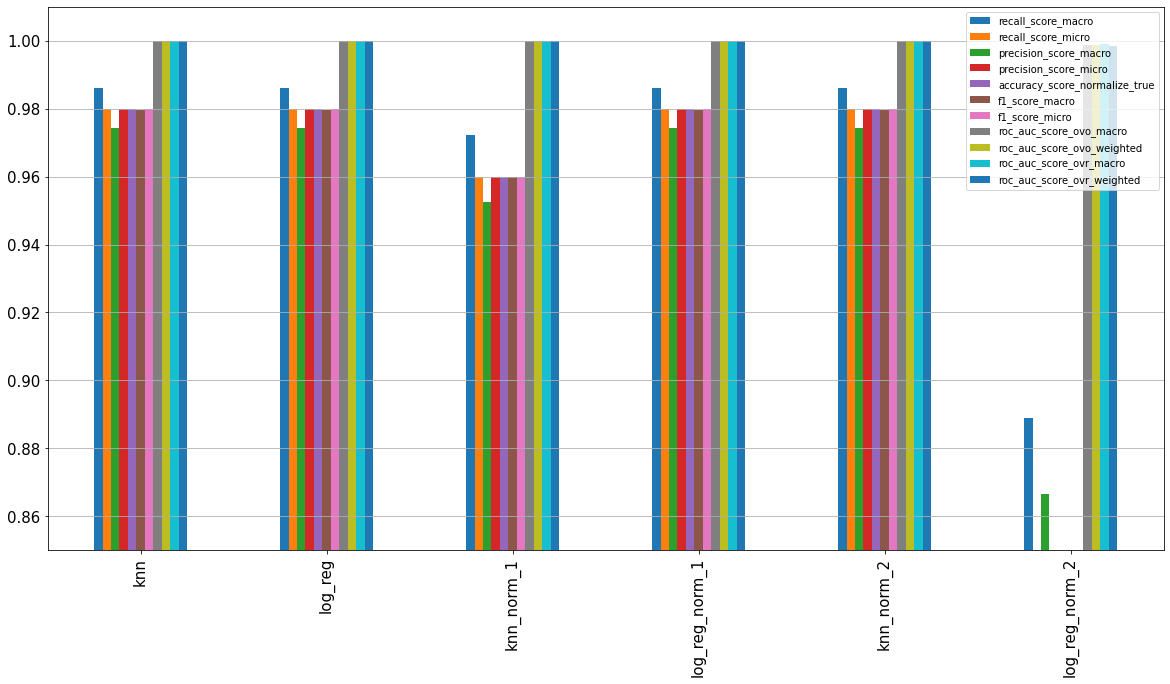

In [19]:
# Визуализируем результаты
ax = df_scores.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.grid(axis='y')
plt.ylim([0.85, 1.01])

(0.85, 1.01)

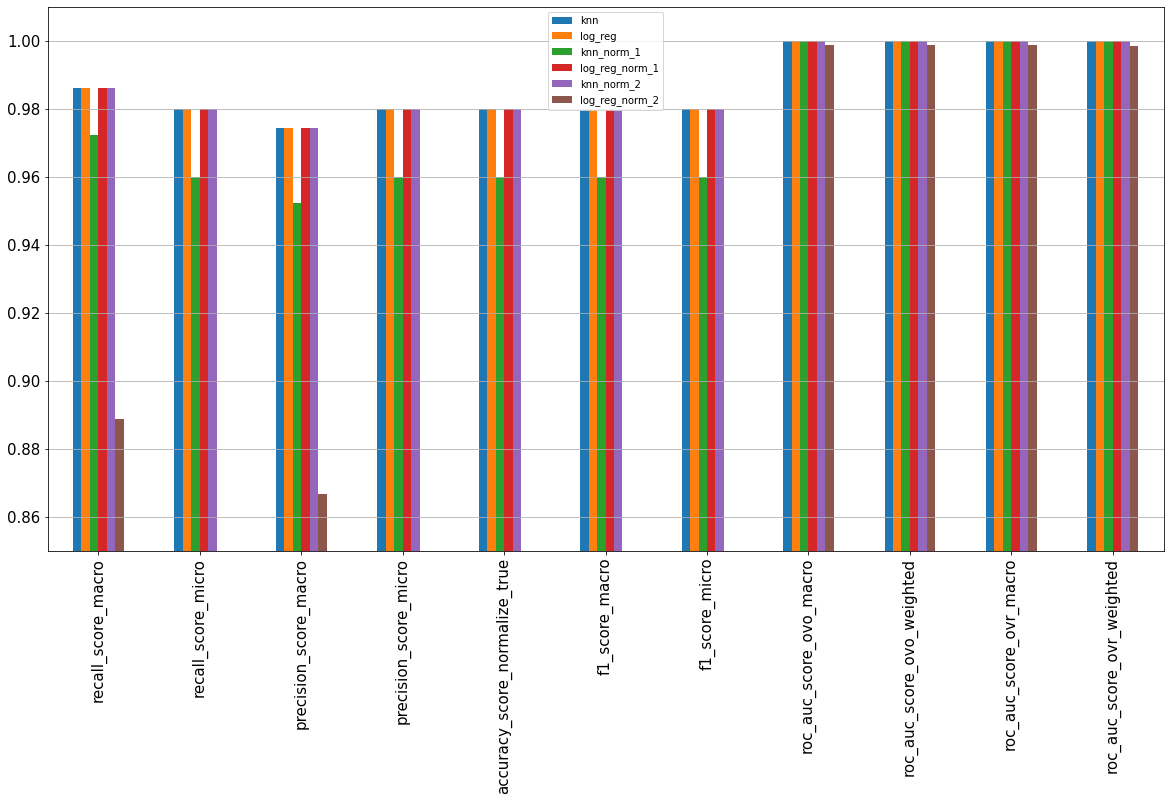

In [21]:
# Визуализируем результаты
ax = df_scores.T.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.grid(axis='y')
plt.ylim([0.85, 1.01])

**Вывод:** для большинства метрик оценки без нормализации и после нормализации соответствуют. В зависимости от способа нормализации некоторые метрики показывают меньшее значение, чем без нормализации.